# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.017186e+01     6.989804e+00
 * time: 0.004027128219604492
     1     2.760083e+01     4.135259e+00
 * time: 0.018733978271484375
     2     1.911554e+01     4.119664e+00
 * time: 0.03681516647338867
     3     1.279644e+01     2.899609e+00
 * time: 0.0548551082611084
     4     1.084166e+01     1.273451e+00
 * time: 0.07275509834289551
     5     9.944662e+00     2.459139e+00
 * time: 0.08697104454040527
     6     9.455193e+00     1.140976e+00
 * time: 0.10127115249633789
     7     9.100958e+00     8.800420e-01
 * time: 0.18001699447631836
     8     8.722858e+00     7.038105e-01
 * time: 0.19396495819091797
     9     8.420848e+00     5.477581e-01
 * time: 0.20783400535583496
    10     8.261896e+00     6.697598e-01
 * time: 0.2216651439666748
    11     8.174780e+00     4.344851e-01
 * time: 0.23543214797973633
    12     8.160407e+00     9.956051e-01
 * time: 0.24589014053344727
    13     8.118655e+00     6.449477e-01
 * time:

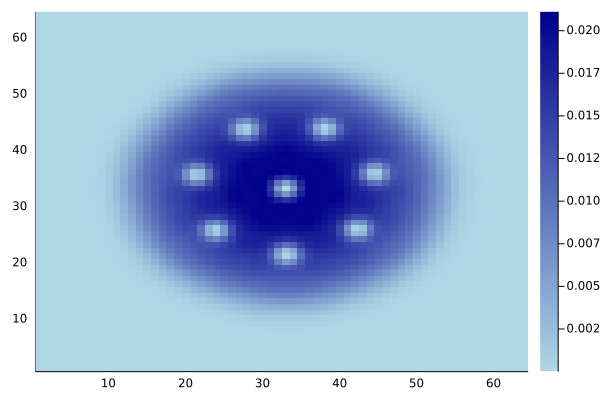

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)